# Estación Cuatro Caminos

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [10, 5]

import warnings
warnings.filterwarnings('ignore')

In [2]:
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from itertools import product

In [3]:
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error
from tqdm import tqdm

In [4]:
df = pd.read_csv("../../data/df_38.csv", index_col=0)
df.index = pd.to_datetime(df.index)

In [5]:
df.head()

,NO2
month,
2013-01-01,52.903226
2013-02-01,43.451613
2013-03-01,34.935484
2013-04-01,35.612903
2013-05-01,34.870968


### Estacionalidad

In [6]:
df2 = df.copy()

In [7]:
df2["año"] = df.index.year
df2["mes"] = df.index.month

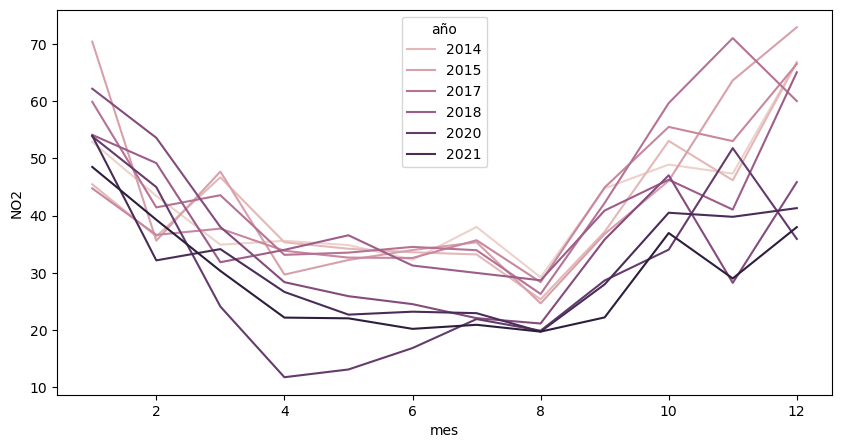

In [8]:
sns.lineplot(x = "mes", y = "NO2", hue = "año", data = df2);

### Estacionaridad

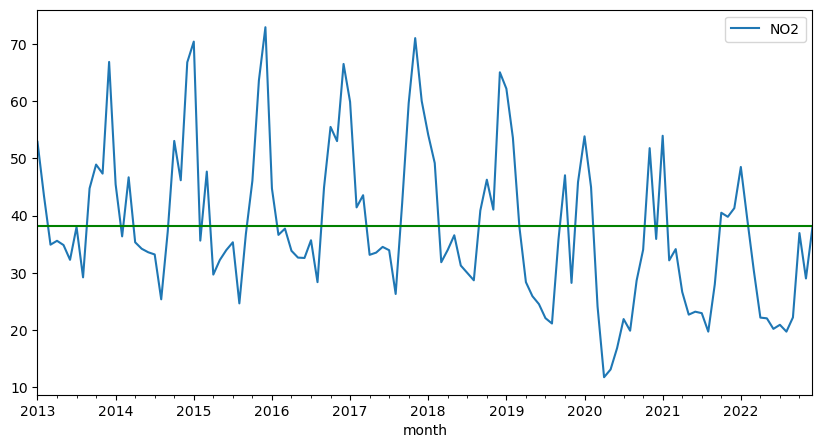

In [9]:
df.plot()
plt.axhline(df.NO2.mean(), c = "g");

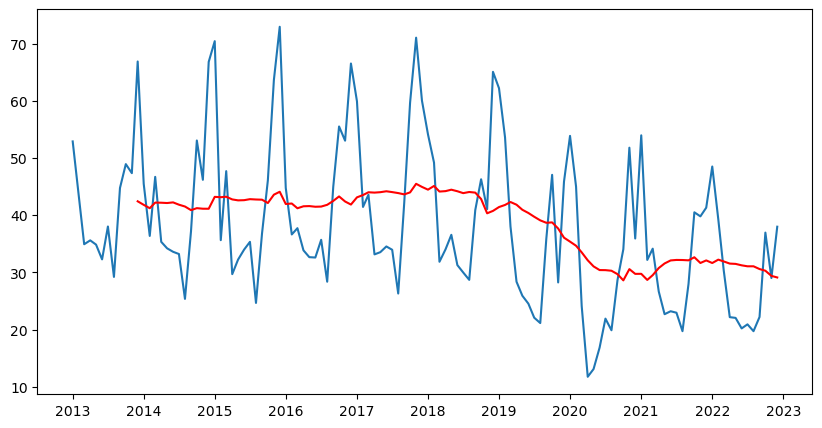

In [10]:
plt.plot(df["NO2"])
plt.plot(df.rolling(window= 12).mean(), c = "r");

In [11]:
df.head()

,NO2
month,
2013-01-01,52.903226
2013-02-01,43.451613
2013-03-01,34.935484
2013-04-01,35.612903
2013-05-01,34.870968


In [12]:
df2.head()

,NO2,año,mes
month,,,
2013-01-01,52.903226,2013,1
2013-02-01,43.451613,2013,2
2013-03-01,34.935484,2013,3
2013-04-01,35.612903,2013,4
2013-05-01,34.870968,2013,5


In [13]:
df3 = df.copy()

In [14]:
df3["year"] = df3.index.year
df3["month"] = df2.index.month
df3.head()

,NO2,year,month
month,,,
2013-01-01,52.903226,2013,1
2013-02-01,43.451613,2013,2
2013-03-01,34.935484,2013,3
2013-04-01,35.612903,2013,4
2013-05-01,34.870968,2013,5


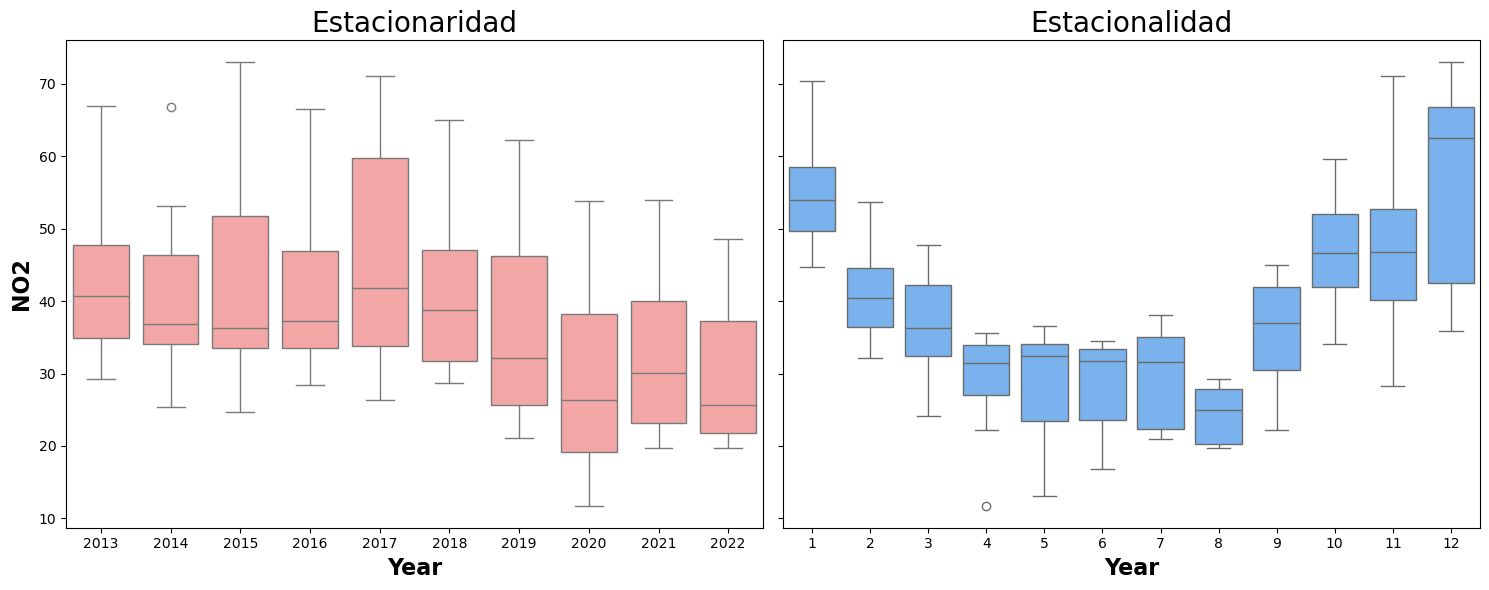

In [15]:
# Nos creamos una lista con las columnas de tiempo
tiempo = df3.columns.drop("NO2")

# Iniciamos los subplots
fig, ax = plt.subplots(nrows=1, ncols=len(tiempo), figsize=(15, 6), sharey=True)

# Nombres personalizados para los títulos
nombres = ["Estacionaridad", "Estacionalidad"]

# Colores bonitos para los boxplots
colores = ["#FF9999", "#66B2FF"]  # Puedes modificar estos códigos de colores

# Hacemos un loop para crear los boxplots para cada año
for i, col in enumerate(tiempo):
    sns.boxplot(data=df3, x=col, y="NO2", ax=ax[i], palette=[colores[i]])
    ax[i].set_title(nombres[i], fontsize=20, loc='center')
    ax[i].set_xlabel('Year', fontsize=16, fontdict=dict(weight='bold'))
    ax[i].set_ylabel('NO2', fontsize=16, fontdict=dict(weight='bold'))

plt.tight_layout()
plt.show()

No hay estacionaridad.

El de estacionalidad estudia todos los eneros, febreros,... de mis años muestra.

La aplicación de la estacionalidad (por ejemplo, a través de un modelo SARIMA con un parámetro estacional) sigue siendo relevante para comprender los patrones recurrentes en tus datos a lo largo del tiempo. Sin embargo, los desplazamientos o irregularidades en la mediana podrían indicar:

Cambios en los patrones estacionales: Las variaciones en la mediana podrían señalar cambios en los patrones estacionales a lo largo del tiempo. Esto puede requerir una exploración adicional para comprender si estas variaciones son anómalas o representan cambios genuinos en la estacionalidad.

Anomalías o eventos atípicos: La presencia de valores atípicos o eventos inusuales en los datos estacionales puede afectar la representación visual de la estacionalidad. Estos eventos pueden causar que la mediana no esté centrada en el boxplot.

En resumen, aunque la mediana desplazada en un boxplot puede indicar cierta variabilidad o cambios en los patrones estacionales, aún puedes aplicar el análisis estacional para comprender los ciclos recurrentes en tus datos. Sin embargo, es importante considerar las posibles anomalías o cambios en los datos que podrían estar afectando la representación visual de la estacionalidad.

### Test de Fuller

In [16]:
res = adfuller(df["NO2"])
res

(0.19822571926774582,
 0.9721619041773839,
 12,
 107,
 {'1%': -3.492995948509562,
  '5%': -2.888954648057252,
  '10%': -2.58139291903223},
 745.9055399357908)

In [17]:
print("AD Fuller Stats", res[0])
print("p-value", res[1])
print("Critical values")

for k, v in res[4].items():
    print(k, round(v, 2))

AD Fuller Stats 0.19822571926774582
p-value 0.9721619041773839
Critical values
1% -3.49
5% -2.89
10% -2.58


*Datos no estacionarios. Su media y su varianza están en función del tiempo 🍋*

### Autocorrelación

In [18]:
for i in range(49):
    print(f"{i} mes Lag, {df['NO2'].autocorr(lag= i)}")

0 mes Lag, 1.0
1 mes Lag, 0.6681196333066834
2 mes Lag, 0.40600463786399615
3 mes Lag, 0.15196097805414266
4 mes Lag, -0.13729334878288946
5 mes Lag, -0.2912670740094365
6 mes Lag, -0.34400557868545806
7 mes Lag, -0.3343839053742319
8 mes Lag, -0.17049263463450123
9 mes Lag, 0.10684517173500777
10 mes Lag, 0.38580103111405856
11 mes Lag, 0.621754346880479
12 mes Lag, 0.7857491318399985
13 mes Lag, 0.667119005343336
14 mes Lag, 0.38977691629474087
15 mes Lag, 0.13071718683738917
16 mes Lag, -0.16932128561894208
17 mes Lag, -0.35706999991215393
18 mes Lag, -0.39528813812969543
19 mes Lag, -0.38638874496637765
20 mes Lag, -0.23301313771376952
21 mes Lag, 0.05042100277545175
22 mes Lag, 0.2743060930906107
23 mes Lag, 0.5960921274365
24 mes Lag, 0.7468813257098141
25 mes Lag, 0.5946015017439472
26 mes Lag, 0.3715842382538381
27 mes Lag, 0.10275318069618397
28 mes Lag, -0.208577348578811
29 mes Lag, -0.4005374692777827
30 mes Lag, -0.47089394199450685
31 mes Lag, -0.4493438260683728
32 mes L

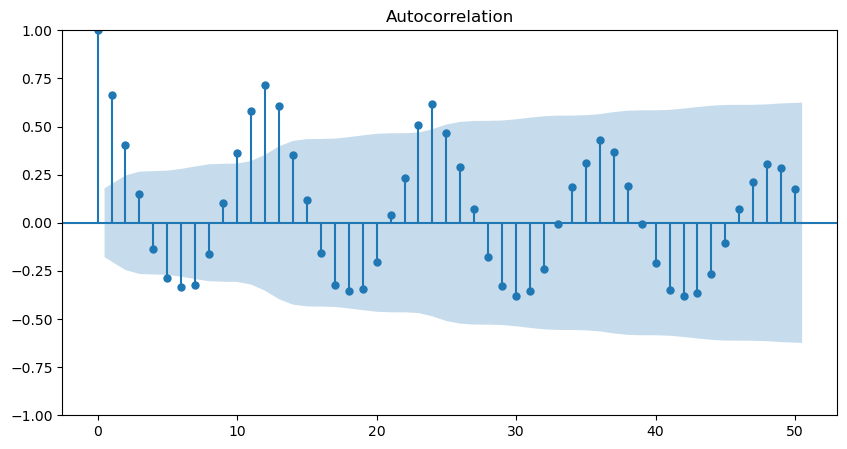

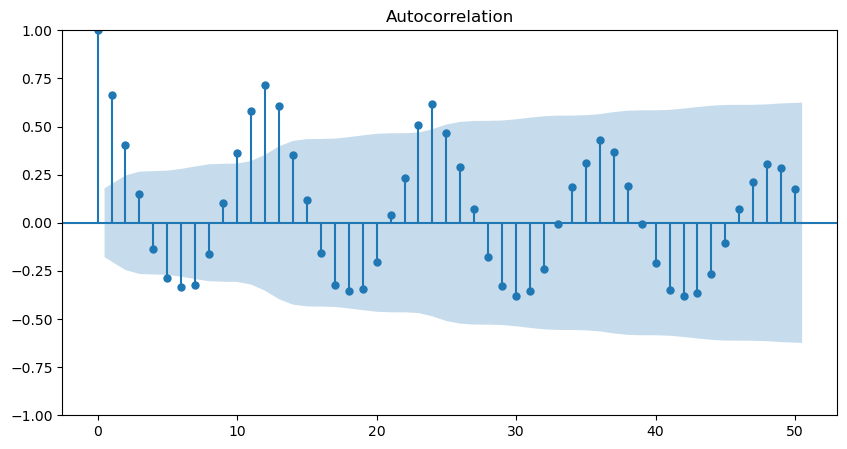

In [19]:
plot_acf(df, lags = 50)

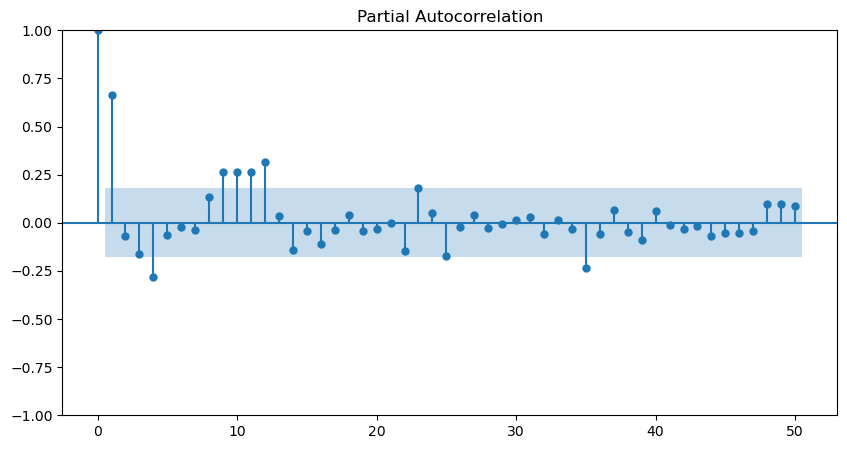

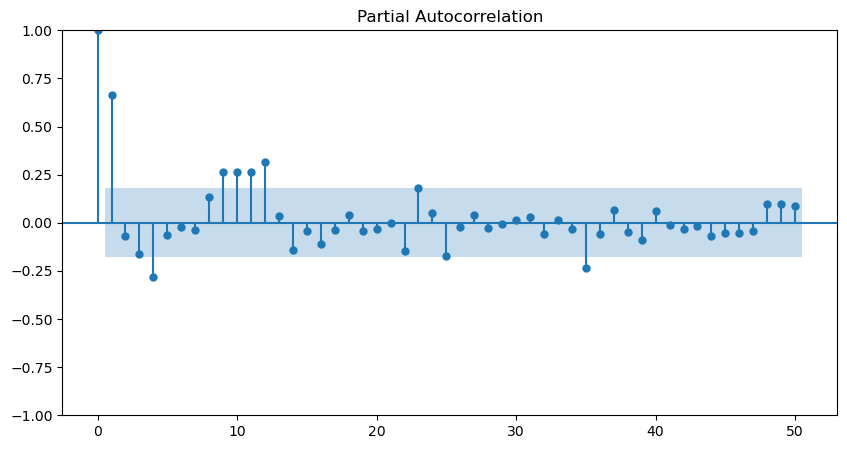

In [20]:
plot_pacf(df, lags = 50)

In [21]:
df.head()

,NO2
month,
2013-01-01,52.903226
2013-02-01,43.451613
2013-03-01,34.935484
2013-04-01,35.612903
2013-05-01,34.870968


In [22]:
df.shape

(120, 1)

In [23]:
df.isnull().sum()

NO2    0
dtype: int64

### SARIMA

In [24]:
y_test = df["NO2"][-30:]
y_train = df["NO2"][:-30]

In [25]:
ps = range(4)
ds = range(1,3)
qs = range(3)

parameters = list(product(ps,ds, qs))
print(parameters)

[(0, 1, 0), (0, 1, 1), (0, 1, 2), (0, 2, 0), (0, 2, 1), (0, 2, 2), (1, 1, 0), (1, 1, 1), (1, 1, 2), (1, 2, 0), (1, 2, 1), (1, 2, 2), (2, 1, 0), (2, 1, 1), (2, 1, 2), (2, 2, 0), (2, 2, 1), (2, 2, 2), (3, 1, 0), (3, 1, 1), (3, 1, 2), (3, 2, 0), (3, 2, 1), (3, 2, 2)]


In [26]:
%%time
rmse = []
order = []
for p, d, q in tqdm(parameters):
    try:
        modelo=ARIMA(y_train, order=(p, d, q)).fit()
        pred = modelo.predict(start=len(y_train), end=len(df) -1)
        error = np.sqrt(np.mean(mean_squared_error(y_test, pred)))
        rmse.append(error)
        order.append((p,d, q))
    except: 
        continue

  0%|          | 0/24 [00:00<?, ?it/s]C:\Users\ccior\anaconda3\envs\proyecto\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\ccior\anaconda3\envs\proyecto\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\ccior\anaconda3\envs\proyecto\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\ccior\anaconda3\envs\proyecto\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\ccior\anaconda3\envs\proyecto\Lib\site-packages\statsmodels\tsa\base\tsa_

 58%|█████▊    | 14/24 [00:00<00:00, 28.47it/s]C:\Users\ccior\anaconda3\envs\proyecto\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\ccior\anaconda3\envs\proyecto\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\ccior\anaconda3\envs\proyecto\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\ccior\anaconda3\envs\proyecto\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\ccior\anaconda3\envs\proyecto\Lib\site-packages\statsmodels\tsa\

CPU times: total: 359 ms
Wall time: 1.17 s


In [27]:
# veamos los resultados de todos los modelos
results = pd.DataFrame({"RMSE": rmse, "order": order})
results.sort_values(by="RMSE", inplace=True)
results.head()

,RMSE,order
2,10.945505,"(0, 1, 2)"
7,12.715348,"(1, 1, 1)"
14,12.850957,"(2, 1, 2)"
8,12.924053,"(1, 1, 2)"
20,13.022789,"(3, 1, 2)"


In [28]:
%%time

modelo=SARIMAX(endog=y_train, 
               exog=None,
               #order=(0, 1, 2),  # modelo arima
               seasonal_order=(0, 1, 2, 12) # modelo sarima, estacionalidad es el último valor
              ).fit(disp=False)
                     
pred=modelo.predict(len(y_train), len(df)-1)  

error=(pred-y_test).abs().sum()/len(pred) 
print ('Error mae: ', error)


res=pd.DataFrame({'real':y_test, 'pred':pred, 'error':pred-y_test})
res

C:\Users\ccior\anaconda3\envs\proyecto\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\ccior\anaconda3\envs\proyecto\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


Error mae:  6.898931114357985
CPU times: total: 0 ns
Wall time: 149 ms


,real,pred,error
2020-07-01,21.935484,23.180604,1.245121
2020-08-01,19.903226,23.302387,3.399161
2020-09-01,28.677419,38.445033,9.767614
2020-10-01,34.064516,49.023001,14.958484
2020-11-01,51.806452,41.292150,-10.514302
2020-12-01,35.935484,56.317395,20.381912
2021-01-01,53.967742,56.906102,2.938360
2021-02-01,32.193548,48.008397,15.814848
2021-03-01,34.161290,31.546611,-2.614679
2021-04-01,26.677419,22.561636,-4.115783


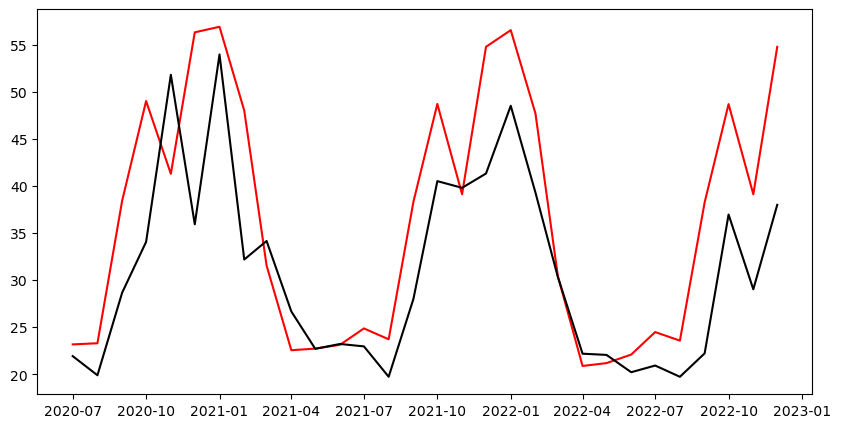

In [29]:
plt.plot(res["pred"], c = "r")
plt.plot(res["real"], c = "black");

In [30]:
pred["real_test"] = y_test

In [31]:
pred_año = pd.DataFrame(modelo.predict(start = len(df), end = len(df) + 9))
pred_año

,predicted_mean
2023-01-01,56.544628
2023-02-01,47.688996
2023-03-01,30.443988
2023-04-01,20.890493
2023-05-01,21.192622
2023-06-01,22.100379
2023-07-01,24.490073
2023-08-01,23.578230
2023-09-01,38.254619
2023-10-01,48.693086


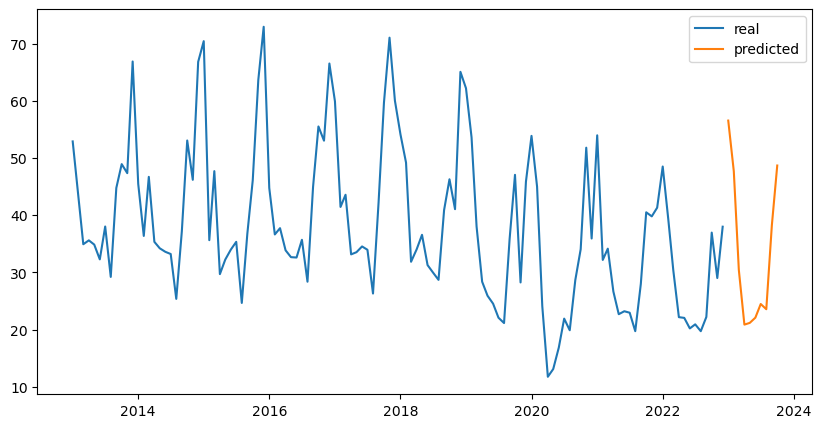

In [32]:
plt.plot(df)
plt.plot(pred_año)
plt.legend(["real", "predicted"]);

In [33]:
pred_año

,predicted_mean
2023-01-01,56.544628
2023-02-01,47.688996
2023-03-01,30.443988
2023-04-01,20.890493
2023-05-01,21.192622
2023-06-01,22.100379
2023-07-01,24.490073
2023-08-01,23.578230
2023-09-01,38.254619
2023-10-01,48.693086


## Datos reales 2023

In [34]:
df23 = pd.read_csv("../../data/emisiones23.csv")

In [35]:
df23.head()

,Unnamed: 0,ESTACION,ANO,MES,NO2
0,0,4,2023,1,32.516129
1,1,4,2023,2,36.741935
2,2,4,2023,3,27.806452
3,3,4,2023,4,22.838710
4,4,4,2023,5,16.612903


### Elijo la estación correspondiente

In [36]:
df_38_23 = df23[df23["ESTACION"] == 38]
df_38_23

,Unnamed: 0,ESTACION,ANO,MES,NO2
98,98,38,2023,1,40.419355
99,99,38,2023,2,36.225806
100,100,38,2023,3,26.935484
101,101,38,2023,4,20.064516
102,102,38,2023,5,17.612903
103,103,38,2023,6,21.193548
104,104,38,2023,7,19.548387
105,105,38,2023,8,16.838710
106,106,38,2023,9,31.483871
107,107,38,2023,10,31.806452


In [37]:
import sys
sys.path.append('../../src')

from clean_support import NO2_clean, estacion_timeseries

In [38]:
estacion_timeseries(df_38_23)

,Unnamed: 0,NO2
month,,
2023-01-01,98,40.419355
2023-02-01,99,36.225806
2023-03-01,100,26.935484
2023-04-01,101,20.064516
2023-05-01,102,17.612903
2023-06-01,103,21.193548
2023-07-01,104,19.548387
2023-08-01,105,16.838710
2023-09-01,106,31.483871


In [39]:
df_38_23.drop("Unnamed: 0", axis=1, inplace=True)

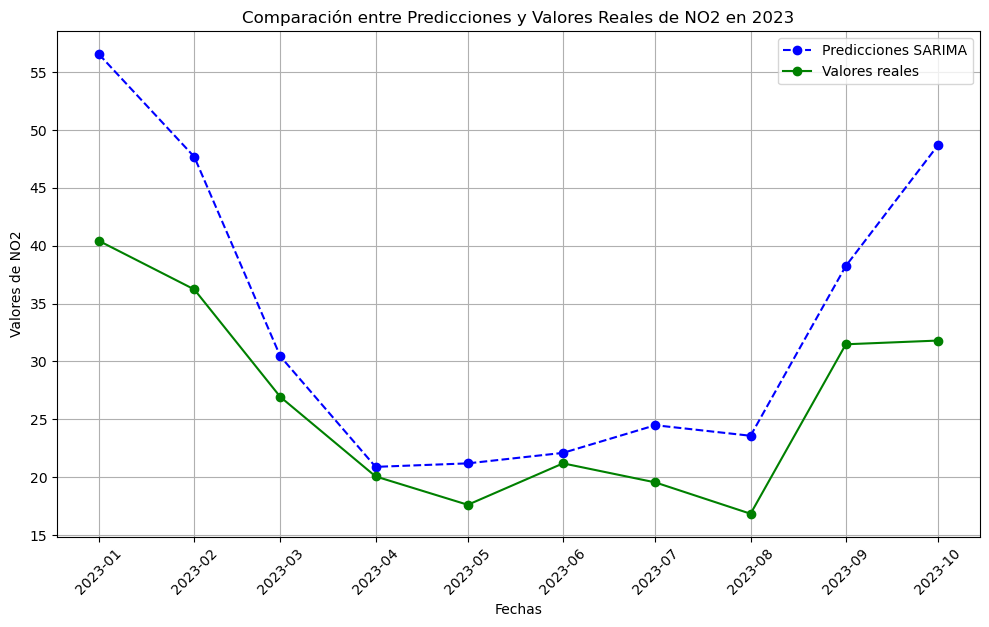

In [40]:
import pandas as pd
import matplotlib.pyplot as plt

# Suponiendo que pred_año y df_08_23 son tus DataFrames con las predicciones y los valores reales respectivamente
# Asegúrate de tener las fechas como índices y las columnas 'predicted_mean' y 'NO2' disponibles

# Convertir las columnas de fechas a objetos datetime si es necesario
pred_año.index = pd.to_datetime(pred_año.index)
df_38_23.index = pd.to_datetime(df_38_23.index)

# Filtrar los datos de 2023 para enero a octubre
predicciones_2023 = pred_año['predicted_mean']['2023-01':'2023-10']
valores_reales_2023 = df_38_23['NO2']['2023-01':'2023-10']

# Crear la gráfica
plt.figure(figsize=(10, 6))
plt.plot(predicciones_2023.index, predicciones_2023, color='blue', label='Predicciones SARIMA', linestyle='--', marker='o')
plt.plot(valores_reales_2023.index, valores_reales_2023, color='green', label='Valores reales', linestyle='-', marker='o')

# Añadir etiquetas, título y leyenda
plt.xlabel('Fechas')
plt.ylabel('Valores de NO2')
plt.title('Comparación entre Predicciones y Valores Reales de NO2 en 2023')
plt.legend()

# Mejorar el diseño
plt.grid(True)
plt.tight_layout()
plt.xticks(rotation=45)  # Rotar las fechas para mayor legibilidad

# Mostrar la gráfica
plt.show()

In [41]:
pred_año["predicted_mean"]
df_38_23["NO2"]

month
2023-01-01    40.419355
2023-02-01    36.225806
2023-03-01    26.935484
2023-04-01    20.064516
2023-05-01    17.612903
2023-06-01    21.193548
2023-07-01    19.548387
2023-08-01    16.838710
2023-09-01    31.483871
2023-10-01    31.806452
Freq: MS, Name: NO2, dtype: float64

### Estimación cierre 2023

In [42]:
pred_año_total = pd.DataFrame(modelo.predict(start = len(df), end = len(df) + 11))
pred_año_total

,predicted_mean
2023-01-01,56.544628
2023-02-01,47.688996
2023-03-01,30.443988
2023-04-01,20.890493
2023-05-01,21.192622
2023-06-01,22.100379
2023-07-01,24.490073
2023-08-01,23.578230
2023-09-01,38.254619
2023-10-01,48.693086


In [43]:
# Obtener las dos últimas filas de pred_año_total
ultimas_filas_pred_año = pred_año_total.tail(2)

# Renombrar la columna 'predicted_mean' como 'NO2' en las dos últimas filas
ultimas_filas_pred_año = ultimas_filas_pred_año.rename(columns={'predicted_mean': 'NO2'})

# Añadir las dos últimas filas al final de los datos reales
frames = [df_38_23, ultimas_filas_pred_año]
df_extendido = pd.concat(frames)

# Verificar el DataFrame extendido
df_extendido

,NO2
2023-01-01,40.419355
2023-02-01,36.225806
2023-03-01,26.935484
2023-04-01,20.064516
2023-05-01,17.612903
2023-06-01,21.193548
2023-07-01,19.548387
2023-08-01,16.838710
2023-09-01,31.483871
2023-10-01,31.806452


In [44]:
df_predict23 = df_extendido.mean()
df_predict23

NO2    29.668604
dtype: float64

In [45]:
dff = df_predict23.to_frame()
dff = dff.rename(columns={0: "Cuatro Caminos"})
dff

,Cuatro Caminos
NO2,29.668604


In [46]:
dff.to_csv('../../clean_visuals/predicts23/38_Cuatro_caminos.csv', index=True)